In [2]:
import os
import librosa
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

In [3]:
SAMPLE_RATE = 22050
FRAME_DURATION = 0.1
HOP_DURATION = 0.05

In [4]:
FOLDER_PATH = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\xeno-canto"

features = []

for file in os.listdir(FOLDER_PATH):
    path = os.path.join(FOLDER_PATH, file)
    y, sr = librosa.load(path, sr=SAMPLE_RATE)

    frame_length = int(FRAME_DURATION * sr)
    hop_length = int(HOP_DURATION * sr)

    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

    for r, z in zip(rms, zcr):
        features.append([r, z])

features = np.array(features).T

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    features, c=3, m=2, error=0.005, maxiter=1000, init=None
)

cluster_labels = np.argmax(u, axis=0)

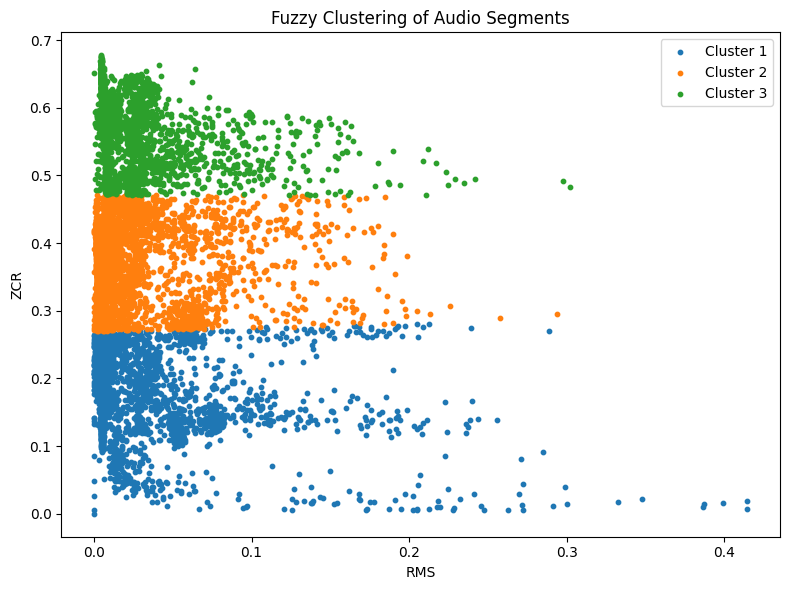

In [5]:
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(features[0, cluster_labels == i], features[1, cluster_labels == i], label=f'Cluster {i+1}', s=10)
plt.xlabel('RMS')
plt.ylabel('ZCR')
plt.title('Fuzzy Clustering of Audio Segments')
plt.legend()
plt.tight_layout()
plt.show()

In [6]:
FOLDER_PATH = r"C:\Users\Lulay\Documents\GitHub\Dasar-Kecerdasan-Artificial_Tugas-Besar\Dataset\noise-audio-data"

features = []

for file in os.listdir(FOLDER_PATH):
    path = os.path.join(FOLDER_PATH, file)
    y, sr = librosa.load(path, sr=SAMPLE_RATE)

    frame_length = int(FRAME_DURATION * sr)
    hop_length = int(HOP_DURATION * sr)

    rms = librosa.feature.rms(y=y, frame_length=frame_length, hop_length=hop_length)[0]
    zcr = librosa.feature.zero_crossing_rate(y=y, frame_length=frame_length, hop_length=hop_length)[0]

    for r, z in zip(rms, zcr):
        features.append([r, z])

features = np.array(features).T

cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    features, c=3, m=2, error=0.005, maxiter=1000, init=None
)

cluster_labels = np.argmax(u, axis=0)

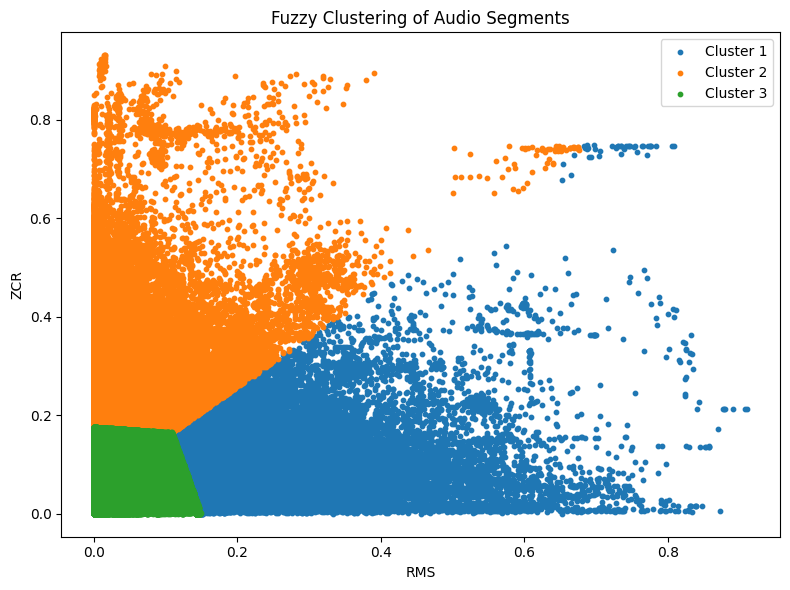

In [7]:
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.scatter(features[0, cluster_labels == i], features[1, cluster_labels == i], label=f'Cluster {i+1}', s=10)
plt.xlabel('RMS')
plt.ylabel('ZCR')
plt.title('Fuzzy Clustering of Audio Segments')
plt.legend()
plt.tight_layout()
plt.show()